In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import tqdm
import glob
import tensorflow 
from keras.utils import to_categorical

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from skimage.io import imread, imshow
from skimage.transform import resize
#from skimage.color import grey2rgb
from skimage.color import rgb2gray

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from keras.models import model_from_json
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.densenet import DenseNet169
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [5]:
batch_size = 64
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        'dataset',  # This is the source directory for training images
        target_size=(200, 200),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['Normal','Parkinson'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


valid_datagen = ImageDataGenerator(rescale = 1./255,
                                   validation_split = 0.2)

test_datagen  = ImageDataGenerator(rescale = 1./255)

Found 111 images belonging to 2 classes.


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:01<00:00,  1.23it/s]


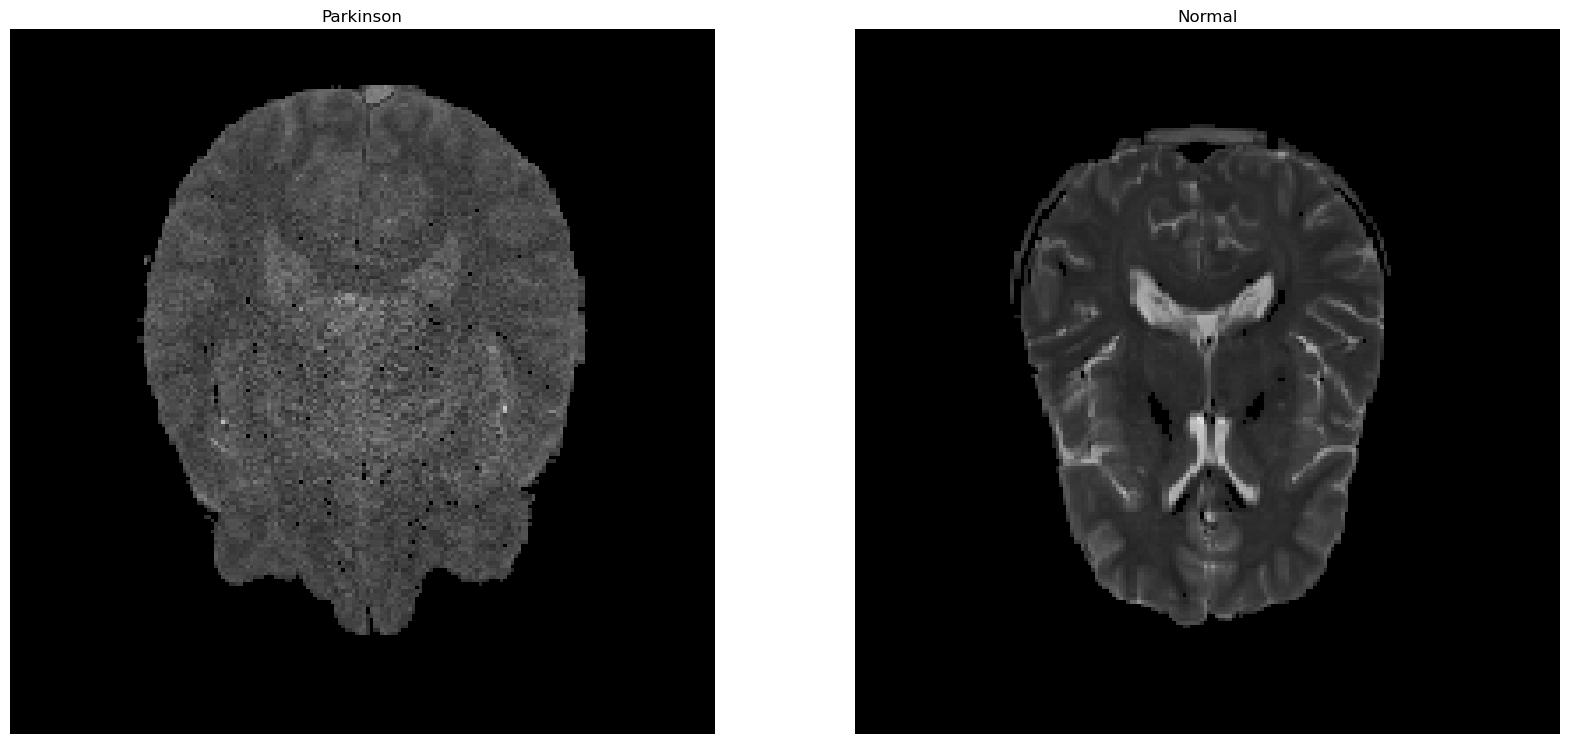

In [6]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize=(20,20))

for i in tqdm(range(0,2)):
    rand1 = np.random.randint(len(train_generator))
    rand2 = np.random.randint(50)
    ax[i].imshow(train_generator[rand1][0][rand2])
    ax[i].axis('off')
    a = train_generator[rand1][1][rand2]
    if a[0] == 1:
        ax[i].set_title('Normal')
    elif a[1] == 1:
        ax[i].set_title('Parkinson')


In [7]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

total_sample=train_generator.n
    

In [10]:
n_epochs = 50

history = model.fit_generator(
        train_generator, 
        steps_per_epoch=int(total_sample/batch_size),  
        epochs=n_epochs,
        verbose=1)

model.save('model2.h5')


C:\NewTemp\ipykernel_8724\1107447893.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50



1/1 [==============================] - 23s 23s/step - loss: 0.6915 - acc: 0.5625
Epoch 2/50
1/1 [==============================] - 3s 3s/step - loss: 0.7137 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 2s 2s/step - loss: 0.6927 - acc: 0.5106
Epoch 4/50
1/1 [==============================] - 3s 3s/step - loss: 0.6858 - acc: 0.6250
Epoch 5/50
1/1 [==============================] - 3s 3s/step - loss: 0.6689 - acc: 0.6094
Epoch 6/50
1/1 [==============================] - 3s 3s/step - loss: 0.7362 - acc: 0.5156
Epoch 7/50
1/1 [==============================] - 3s 3s/step - loss: 0.6884 - acc: 0.5625
Epoch 8/50
1/1 [==============================] - 4s 4s/step - loss: 0.6881 - acc: 0.5000
Epoch 9/50
1/1 [==============================] - 4s 4s/step - loss: 0.6823 - acc: 0.5532
Epoch 10/50
1/1 [==============================] - 3s 3s/step - loss: 0.6666 - acc: 0.6596
Epoch 11/50
1/1 [==============================] - 2s 2s/step - loss: 0.6557 - acc: 0.6170
Epoch 12/50
1/1 [

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


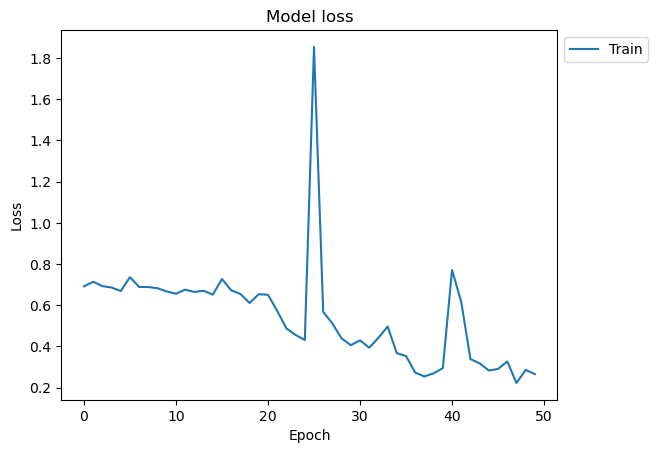

In [11]:

# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left', bbox_to_anchor=(1,1))

plt.show()

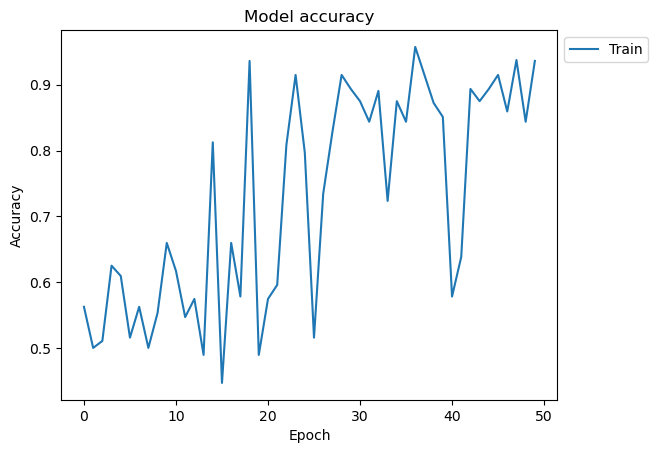

In [12]:
plt.plot(history.history['acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left', bbox_to_anchor=(1,1))
plt.show()